<a href="https://colab.research.google.com/github/lucianosilva-github/visaocomputacional/blob/master/Aula%2019/Visa%CC%83o_Computacional_Aula_19-SOLUCOES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **VISÃO COMPUTACIONAL - AULA 19**

**Objetivos da aula:**

*   revisar os conceitos de Visão Estéreo, Geometria Epipolar, Matriz Fundamental e Matriz Essencial
*   introduzir os conceitos de geometria de múltiplas visões, geometria trifocal e tensor trifocal
*   praticar com o módulo pymvg


### <b> REVISÃO DE GEOMETRIA EPIPOLAR </b>

Quando trabalhamos com o modelo de câmera pinhole, perdemos uma noção importante: profundidade. Uma das maneiras para se perceber profundidade é com o uso de câmeras, conhecida como <b> Visão Estéreo</b>. 

<img src="https://opencv24-python-tutorials.readthedocs.io/en/latest/_images/epipolar.jpg"> </img>

Usando somente a câmera de centro <i>O</i>, temos várias possibilidades de pontos X que podem ser projetados no ponto x da imagem. Porém, se consideramos uma outra câmera <i>O'</i>, os pontos x' correspondentes aos pontos x levam a um único ponto X possível no espaço, que pode ser calculado através da intersecção das semiretas <i>Ox</i> e <i>O'x'</i>. 

As linhas <i>l</i> e <i>l'</i> são chamadas <b>linhas epipolares</b> e contém pontos correspondentes em projeção nas duas imagens, conhecidos como <b>epipolos</b>. O plano <i>OXO'</i> é chamado de <b>plano epipolar</b>.

Conhecidos os centros <i>O</i>, <i>O'</i> e alguns pares de epipolos <i>(e,e')</i> (normalmente, dependemos da técnica utilizada, usamos oito epipolos ou mais), é possível reconstruir as matrizes de projeção das câmeras <i>O</i> e <i>O'</i>. Esta determinação de matrizes é realizada com o auxílio da <b>Geometria Epipolar</b>.

Para simplificar o nosso modelo de duas câmeras, vamos considerar duas câmeras com os mesmos parâmetros intrínsecos (distância focal, tamaho do plano de projeção, dentre outros) e posicionadas diferentemente utilizando uma translação e uma rotação.

<img src="https://opencv24-python-tutorials.readthedocs.io/en/latest/_images/essential_matrix.jpg"> </img>

Vamos designar as matrizes das câmeras de <i>K</i> e <i>K'</i>, associadas aos centros <i>O</i> e <i>O'</i>, respectivamente. Para determinar estas duas matrizes, vamos duas outras matrizes: <b> Matriz Essencial (E)</b> e a <b> Matriz Fundamental(F) </b>.

A matriz essencial E contém informações sobre a translação T e a rotação R da câmera <i>O'</i>, em relação à câmera <i>O</i>. A matriz fundamental F permite projetar uma linha epipolar de imagem na linha epipolar correspodnente na outra imagem.

### <b> MATRIZ FUNDAMENTAL F </b>

A matriz fundamental F pode ser obtida resolvendo o sistema de equações lineares abaixo:

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/6ab25460ff5b12e37a92d4ad41487802476c69be"> </img>
</center>

A matriz F é uma matrix 3x3. Assim, 8 equações são suficientes para determiná-la completamente. Estas equações são obtidas através de 8 pares de epipolos <i>(e,e')</i> correspondentes nas duas imagens.





### <b> MATRIZ FUNDAMENTAL F </b>

A matriz fundamental F pode ser obtida resolvendo o sistema de equações lineares abaixo:

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/6ab25460ff5b12e37a92d4ad41487802476c69be"> </img>
</center>

A matriz F é uma matrix 3x3. Assim, 8 equações são suficientes para determiná-la completamente. Estas equações são obtidas através de 8 pares de epipolos <i>(e,e')</i> correspondentes nas duas imagens.

### <b> MATRIZ ESSENCIAL E </b>

A matriz fundamental E satisfaz a equação abaixo, onde K e K' são as matrizes das duas câmeras e, F, a matriz fundamental.


Se soubermos a matriz essencial E, podemos obter as matrizes associadas às câmeras. Uma maneira de fazer isto é supor que K seja a matriz identidade e, em função dela,determinar a matriz K'.





### <b> MATRIZ ESSENCIAL E </b>

A matriz fundamental E satisfaz a equação abaixo, onde K e K' são as matrizes das duas câmeras e, F, a matriz fundamental.

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/94797b318a9e805f6515cee74fa3de42ac35ee7a"> </img>
</center>

Se soubermos a matriz essencial E, podemos obter as matrizes associadas às câmeras. Uma maneira de fazer isto é supor que K seja a matriz identidade e, em função dela,determinar a matriz K'.

Obtendo a matriz E, podemos decompô-la em fatores usando a decomposição SVD (Decomposição em Valores Singulares). A decomposição SVD permite decompor uma matriz M em três componentes:

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f577effb716a33019b63f9072fd245bb2a751bdb"> </img>
</center>

Por exemplo, a matriz M mostrada abaixo

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0d5d3df9cf619062481ab2a6b328467990152f1a"> </img>
</center>

possui a seguinte decomposição em valores singulares

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/73fdf5fe339a08566cccb833c860558092532f74"> </img>
</center>

A matriz do centro é sempre uma matriz diagonal, formada por autovalores. As matrizes U e V* são matrizes unitárias, isto é, multiplicado elas por elas mesmas, produzimos a matriz identidade:

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a7f128976e087ec8136d54eeaab90a2eda2a09bc"> </img>
</center>
<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/43daa2de3e7835aba9c75c1eef02bbe5c2d6f687"> </img>
</center>


Para obter uma possível matriz de rotação de uma câmera e sua translação em relação a outra câmera, podemos usar as seguintes relações:

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/982105be58f296a050d9bd1be02ec12d1c578c21"> </img>
</center>

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/bc1799dbc7da928a0d4576f5b9ed5d21d955be72"> </img>
</center>

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/563ddbeb35c985502bc0bb0b0cc13178a2b68c43"> </img>
</center>

<center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f48a92bc850bdfa4b0e313281f1ba9ae8a0af0ac"> </img>
</center>

#### <b> GEOMETRIA COM TRÊS CÂMERAS (TRIFOCAL) E O TENSOR TRIFOCAL </b>

Assim como num sistema com duas imagens, podemos extrair informações sobre o cenário em 3D através da correspondência entre pontos, retas, tangentes e segmentos de curvas com três ou mais imagens. Isto é chamado genericamente de **Geometria de Múltiplas Visões**.

<center> <img src="https://miro.medium.com/max/810/1*wzzIPX7GiBOU-ON6kDp0Dg.jpeg"> </img> </center>

Nesta aula, trabalhemos com três visões, através de um sistema de três câmeras **(Geometria Trifocal)**. Nesta configuração três câmeras, temos a seguinte configuração:

<center> <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F27575648586264FE04"> </img> </center>

Neste tipo de geometria, temos três linhas epipolares: l, l' e l''. A partir delas, definimos o **tensor trifocal**: 

<center> <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F24147A4B5862653424"> </img></center>

As matrizes de câmeras são calculadas a partir do tensor trifocal. Para calcular o tensor trifocal, precisamos de **seis pontos em cada imagem**   correspondentes nas três imagens. Observe que esta quantidade é menor que na **visão bifocal (visão estéreo)**, onde precisávamos de **8 pontos**. 

Detalhes da obtenção das câmeras podem ser obtidos no seguinte artigo: 

https://stuartheinrich.com/cv/els_robust_tensor.pdf 







#### <b> MÓDULO PYMVG </b>

O módulo pymvg (Python Multiple View Geometry) permite especificar configuração para geometria de múltiplas visões em Python. Este módulo pode ser encontrado no link abaixo: 

https://pymvg.readthedocs.io/en/latest/ 

Este módulo não é parte oficial da linguagem Python. Assim, precisamos instalá-lo via pip:

In [1]:
!pip install pymvg

     |████████████████████████████████| 44 kB 1.5 MB/s 
  Created wheel for pymvg: filename=pymvg-2.0.0-py3-none-any.whl size=45459 sha256=8f8aa47e5c230b1a0dc909e06ec140254763f539b3700e22972068d73956a77a
  Stored in directory: /root/.cache/pip/wheels/53/63/56/8daadc8a194dc0ee832488f5f992ad15febc6642e8421d4a69
Successfully built pymvg


Já existem algumas configurações prontas para uso: 

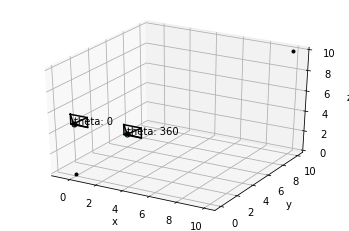

In [4]:
from pymvg.plot_utils import plot_camera
from pymvg.multi_camera_system import build_example_system
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

n=2
focal_distance=5.0
system = build_example_system(n=n,z=focal_distance)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for name in system.get_names():
    plot_camera( ax, system.get_camera(name), scale = focal_distance/5.0 )

if 1:
    # put some points to force mpl's view dimensions
    pts = np.array([[0,0,0],
                    [2*focal_distance, 2*focal_distance, 2*focal_distance]])
    ax.plot( pts[:,0], pts[:,1], pts[:,2], 'k.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Ou podemos especificar individualmente cada câmera e construir a configuração manualmente:

In [5]:
import pymvg
from pymvg.camera_model import CameraModel
from pymvg.multi_camera_system import MultiCameraSystem

lookat = np.array( (0.0, 0.0, 0.0))
#Camera 1
center1 = np.array( (0.0, 0.0, 10.0) )
cam1 = CameraModel.load_camera_simple(name='cam1',fov_x_degrees=90,eye=center1,lookat=lookat)
#Camera 2
center2 = np.array( (10.0, 0.0, 0.0) )
cam2 = CameraModel.load_camera_simple(name='cam2',fov_x_degrees=90,eye=center2,lookat=lookat)
#Camera 3
center3 = np.array( (10.0, 10.0, 0.0) )
cam3 = CameraModel.load_camera_simple(name='cam3',fov_x_degrees=90,eye=center3,lookat=lookat)   
cameras = [cam1,cam2,cam3]
system = MultiCameraSystem(cameras)

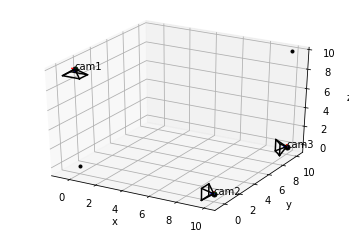

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for name in system.get_names():
    plot_camera( ax, system.get_camera(name), scale = focal_distance/5.0 )

if 1:
    # put some points to force mpl's view dimensions
    pts = np.array([[0,0,0],
                    [2*focal_distance, 2*focal_distance, 2*focal_distance]])
    ax.plot( pts[:,0], pts[:,1], pts[:,2], 'k.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

#### <b> EXERCÍCIO </b>

Especifique uma configuração de câmeras em pymvg que permita escanear objetos como mostrado ma imagem abaixo:

<center> <img src="https://3be.com.br/wp-content/uploads/2019/10/EinScan-SE-feature-1.png"> </img></center>



In [8]:
import pymvg
from pymvg.camera_model import CameraModel
from pymvg.multi_camera_system import MultiCameraSystem

lookat = np.array( (0.0, 0.0, 0.0))
#Camera 1
center1 = np.array( (50.0, 0.0, 0.0) )
cam1 = CameraModel.load_camera_simple(name='cam1',fov_x_degrees=90,eye=center1,lookat=lookat)
#Camera 2
center2 = np.array( (0.0, 50.0, 0.0) )
cam2 = CameraModel.load_camera_simple(name='cam2',fov_x_degrees=90,eye=center2,lookat=lookat)
#Camera 3
center3 = np.array( (-50.0, 0.0, 0.0) )
cam3 = CameraModel.load_camera_simple(name='cam3',fov_x_degrees=90,eye=center3,lookat=lookat) 

#Camera 4
center2 = np.array( (0.0, -50.0, 0.0) )
cam4 = CameraModel.load_camera_simple(name='cam4',fov_x_degrees=90,eye=center2,lookat=lookat)

#Camera 5
center2 = np.array( (0.0, 0.0, 50.0) )
cam5 = CameraModel.load_camera_simple(name='cam5',fov_x_degrees=90,eye=center2,lookat=lookat)

cameras = [cam1,cam2,cam3,cam4,cam5]
system = MultiCameraSystem(cameras)

#### <b> EXERCÍCIO </b>

Especifique uma configuração de 3 câmeras focando na origem e com os seguintes centros: (20,0,0), (20,20,20) e (0,0,20).

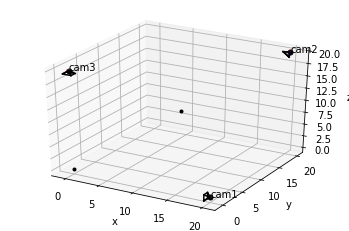

In [9]:
import pymvg
from pymvg.camera_model import CameraModel
from pymvg.multi_camera_system import MultiCameraSystem

lookat = np.array( (0.0, 0.0, 0.0))
#Camera 1
center1 = np.array( (20.0, 0.0, 0.0) )
cam1 = CameraModel.load_camera_simple(name='cam1',fov_x_degrees=90,eye=center1,lookat=lookat)
#Camera 2
center2 = np.array( (20.0, 20.0, 20.0) )
cam2 = CameraModel.load_camera_simple(name='cam2',fov_x_degrees=90,eye=center2,lookat=lookat)
#Camera 3
center3 = np.array( (0.0, 0.0, 20.0) )
cam3 = CameraModel.load_camera_simple(name='cam3',fov_x_degrees=90,eye=center3,lookat=lookat)   
cameras = [cam1,cam2,cam3]
system = MultiCameraSystem(cameras)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for name in system.get_names():
    plot_camera( ax, system.get_camera(name), scale = focal_distance/5.0 )

if 1:
    # put some points to force mpl's view dimensions
    pts = np.array([[0,0,0],
                    [2*focal_distance, 2*focal_distance, 2*focal_distance]])
    ax.plot( pts[:,0], pts[:,1], pts[:,2], 'k.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

#### <b> EXERCÍCIO </b>

Considerando a configuração do exercício anterior, calcule as coordenadas dos pixels resultantes da projeção dos seis pontos abaixo nos planos de imagens de cada uma das câmeras: 

*   (0,0,0)
*   (1,1,0)
*   (1,1,1)
*   (1,0,1)
*   (0,1,1)
*   (0,0,1)



In [11]:
pt3d=[[0,0,0],
      [1,1,0],
      [1,1,1],
      [1,0,1],
      [0,1,1],
      [0,0,1]]

px1=cam1.project_3d_to_pixel(pt3d,distorted=False)
print(px1)
px2=cam2.project_3d_to_pixel(pt3d,distorted=False)
print(px2)
px3=cam2.project_3d_to_pixel(pt3d,distorted=False)
print(px3)

[[320.         240.        ]
 [320.         256.84210526]
 [336.84210526 256.84210526]
 [336.84210526 240.        ]
 [336.         256.        ]
 [336.         240.        ]]
[[320.         240.        ]
 [313.24278692 243.90127879]
 [320.         240.        ]
 [320.         232.19744241]
 [326.75721308 243.90127879]
 [326.64268405 236.16484458]]
[[320.         240.        ]
 [313.24278692 243.90127879]
 [320.         240.        ]
 [320.         232.19744241]
 [326.75721308 243.90127879]
 [326.64268405 236.16484458]]


#### <b> DESAFIO </b>

A partir de cada conjunto de pixels projetados, reconstrua a configuração 3D dos pontos que originaram estes pixels projetados em cada câmera.

In [12]:
pt3d_1=cam1.project_pixel_to_camera_frame(px1,distorted=False)
pt3d_1

array([[0.        , 0.        , 1.        ],
       [0.        , 0.05255883, 0.99861783],
       [0.05248639, 0.05248639, 0.99724137],
       [0.05255883, 0.        , 0.99861783],
       [0.04987547, 0.04987547, 0.99750934],
       [0.04993762, 0.        , 0.99875234]])

#### <b> PRÓXIMAS AULAS </b>



*   **23/11** - Reconstrução de Point Clouds
*   **25/11** - Machine Learning para Point Clouds (Segmentação Semântica)
*   **30/11** - Revisão para P2


